In [368]:
import selenium
import pandas as pd
import numpy as np
import unittest
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import chrome
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re

In [369]:

def convert_text_to_number(text):
  """Converts a text string of a large number with commas to a number.

  Args:
    text: The text string to convert.

  Returns:
    The number represented by the text string.
  """

  pattern = r"^(-?\d+)(\,\d+)?"
  match = re.match(pattern, text)
  if match:
    return int(match.group(1).replace(",", ""))
  else:
    return None

In [370]:
# Set up the Selenium web driver
options = webdriver.ChromeOptions()
options.add_experimental_option("detach", True)
driver = webdriver.Chrome(options=options , service=Service(ChromeDriverManager().install()))


In [371]:

cities = ["חיפה”", "נתניה", "תל אביב"]
date_arr = []
street_arr = []
rooms_arr = []
area_size_arr = []
floor_arr = []
price_arr = []
price_per_sm_arr = []
year_arr = []
city_arr = []

for city in cities:
    driver.get('https://www.ad.co.il/nadlanprice?keyword=' + city)
    
    element = driver.find_elements(By.XPATH , '//*[@id="cards"]/div/table/tbody/tr')
    for row in element:
        date = row.find_elements(By.TAG_NAME, "td")[0]
        ci = row.find_elements(By.TAG_NAME, "td")[1]
        street = row.find_elements(By.TAG_NAME, "td")[2]
        rooms = row.find_elements(By.TAG_NAME, "td")[3]
        area_size = row.find_elements(By.TAG_NAME, "td")[4]
        floor = row.find_elements(By.TAG_NAME, "td")[5]
        price = row.find_elements(By.TAG_NAME, "td")[6]
        price_per_sm = row.find_elements(By.TAG_NAME, "td")[7]
        year = row.find_elements(By.TAG_NAME, "td")[8]

        print(date.text, ci.text, street.text, rooms.text, area_size.text, floor.text, price.text, price_per_sm.text, year.text)
        date_arr.append(date.text)
        street_arr.append(street.text)
        rooms_arr.append(convert_text_to_number(rooms.text))
        area_size_arr.append(convert_text_to_number(area_size.text))
        floor_arr.append(convert_text_to_number(floor.text))
        price_arr.append(convert_text_to_number(price.text))
        if price_per_sm:
         price_per_sm_arr.append(price_per_sm.text)
        else:
         price_per_sm_arr.append(None)
        year_arr.append(convert_text_to_number(year.text))
        city_arr.append(city)
    
driver.quit()

21/1/2021 נתניה שדרות בן צבי 6 163  2,195,091 13,466 2020
21/1/2021 נתניה אגם 1 6 163 20 2,195,091 13,466 2020
18/1/2021 נתניה ירושלים 5 4 129 7 1,650,000 12,790 1970
18/1/2021 נתניה שדרות ירושלים 5 4 129  1,650,000 12,790 1970
18/1/2021 נתניה נתניה 1 5 156 25 2,435,000 15,608 2017
18/1/2021 נתניה הגולן 11 5 132 5 2,150,000 16,287 2007
18/1/2021 נתניה שלום עליכם 5 156  2,435,000 15,608 2017
18/1/2021 נתניה הגלעד 5 132  2,150,000 16,287 2007
17/1/2021 נתניה דודו דותן 6 5 135  3,600,000 26,666 2013
15/1/2021 נתניה חבצלת החוף 22 5 112 4 1,700,000 15,178 1995
15/1/2021 נתניה רותם 5 112  1,700,000 15,178 1995
14/1/2021 נתניה נתניה - ללא רחוב 1 5 118 6 1,950,000 16,525 2022
14/1/2021 נתניה לח''י 6 5 118  1,950,000 16,525 2022
13/1/2021 נתניה אריה בן אליעזר 41 3 72  1,165,000 16,180 1960
13/1/2021 נתניה בן אליעזר 37 3 72 3 1,165,000 16,180 1960
11/1/2021 נתניה נתניה 1 6 235 13 5,800,000 24,680 2017
11/1/2021 נתניה שושנה דמארי 12 6 235  5,800,000 24,680 2017
10/1/2021 נתניה דניאל 45 5 140  1,9

In [372]:
d = {'date': date_arr,
'rooms': rooms_arr,
'area_size': area_size_arr,
'floor': floor_arr,
'price': price_arr,
'year': year_arr,
'city': city_arr}

df = pd.DataFrame(data=d)

print(df)



         date  rooms  area_size  floor  price    year     city
0   21/1/2021    6.0      163.0    NaN      2  2020.0    נתניה
1   21/1/2021    6.0      163.0   20.0      2  2020.0    נתניה
2   18/1/2021    4.0      129.0    7.0      1  1970.0    נתניה
3   18/1/2021    4.0      129.0    NaN      1  1970.0    נתניה
4   18/1/2021    5.0      156.0   25.0      2  2017.0    נתניה
..        ...    ...        ...    ...    ...     ...      ...
95  14/1/2021    3.0       71.0    4.0      3  2020.0  תל אביב
96  14/1/2021    4.0       91.0    NaN      3  2022.0  תל אביב
97  14/1/2021    4.0       91.0    1.0      3  2022.0  תל אביב
98  13/1/2021    5.0      125.0    3.0      4  2022.0  תל אביב
99  13/1/2021    5.0      125.0    NaN      4  2022.0  תל אביב

[100 rows x 7 columns]


In [373]:
class TestLoss(unittest.TestCase):

  def test_zero_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([0])), 0)

  def test_one_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([1]), y=np.array([0])), 0.5)

  def test_two_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([2]), y=np.array([0])), 2)
    
  def test_zero_h_one_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([1])), 0.5)
    
  def test_zero_h_two_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([2])), 2)

In [374]:
def loss(h, y):
  sq_error = (h - y)**2
  n = len(y)
  return 1.0 / (2*n) * sq_error.sum()

In [375]:
df.fillna(0, inplace=True)
x = df[['rooms', 'area_size']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create DataFrame with feature names
feature_names = ['rooms', 'area_size']
x_train = pd.DataFrame(x_train, columns=feature_names)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.1857839372757177


In [376]:
class TestLinearRegression(unittest.TestCase):

    def test_find_coefficients(self):
      clf = LinearRegression()
      clf.fit(x, y, n_iter=2000, lr=0.01)
      np.testing.assert_array_almost_equal(clf._W, np.array([180921.19555322,  56294.90199925]))


In [377]:
class LinearRegression:
  
  def predict(self, X):
    return np.dot(X, self._W)

  def _gradient_descent_step(self, X, targets, lr):
    predictions = self.predict(X)
    error = predictions - targets
    gradient = np.dot(X.T, error) / len(X)
    self._W -= lr * gradient

  def fit(self, X, y, n_iter=100000, lr=0.01):

    self._W = np.zeros(X.shape[1])

    for i in range(n_iter):        
        self._gradient_descent_step(x, y, lr)       
        
    return self

In [378]:
clf = LinearRegression()
clf.fit(x, y, n_iter=2000, lr=0.01)

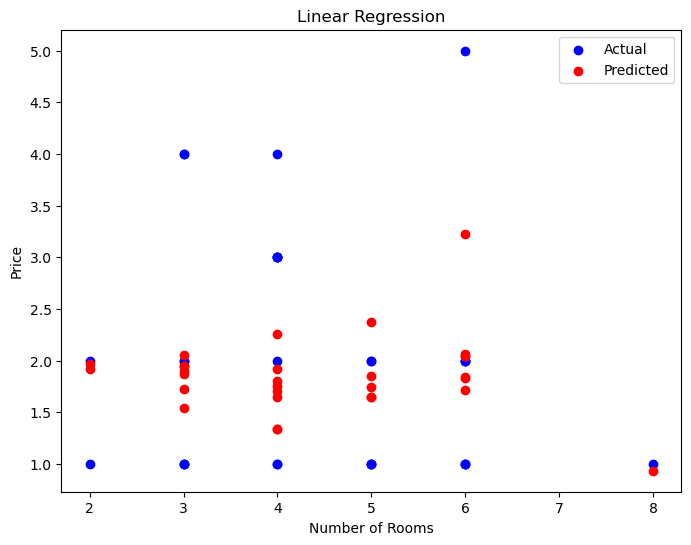

c:\Users\Sharon\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


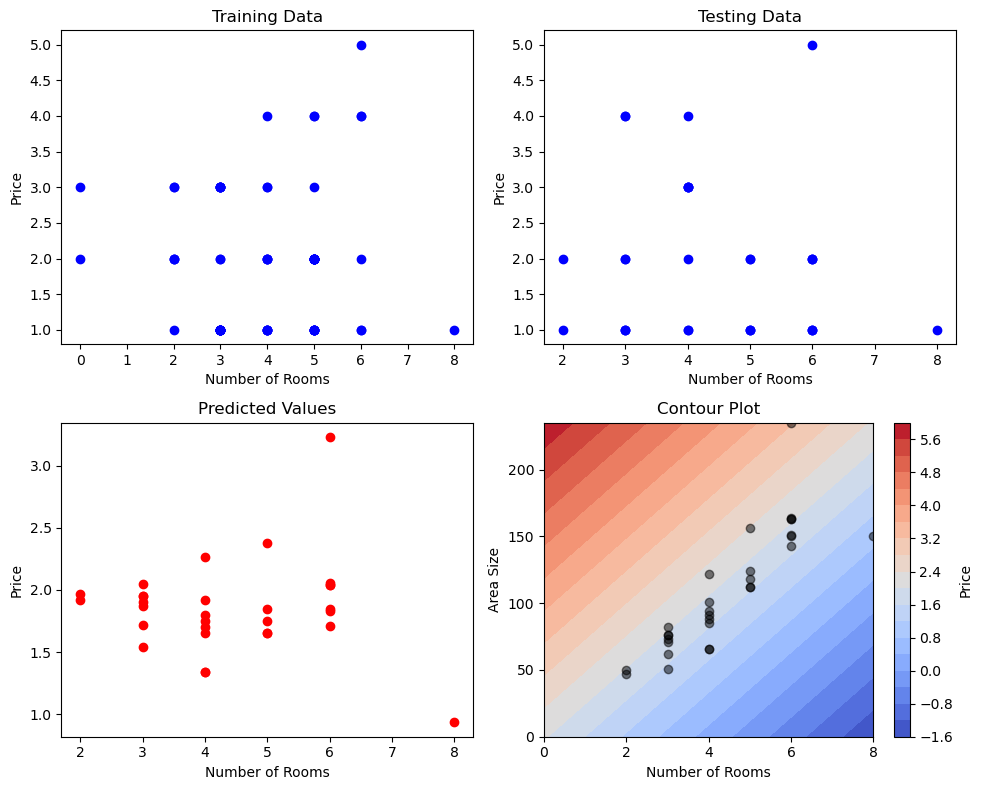

In [384]:
import matplotlib.colorbar as cbar

# Set the feature names of x_test
x_test.columns = ['rooms', 'area_size']

# Plotting the scatter plot with the regression line
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x_test['rooms'], y_test, color='blue', label='Actual')
ax.scatter(x_test['rooms'], y_pred, color='red', label='Predicted')
ax.set_xlabel('Number of Rooms')
ax.set_ylabel('Price')
ax.set_title('Linear Regression')
ax.legend()
plt.show()

# Plotting the contour plot
x_range = np.linspace(np.min(x['rooms']), np.max(x['rooms']), 100)
y_range = np.linspace(np.min(x['area_size']), np.max(x['area_size']), 100)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)
z_mesh = model.predict(np.array([x_mesh.ravel(), y_mesh.ravel()]).T).reshape(x_mesh.shape)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plot of training data
axs[0, 0].scatter(x_train['rooms'], y_train, color='blue')
axs[0, 0].set_xlabel('Number of Rooms')
axs[0, 0].set_ylabel('Price')
axs[0, 0].set_title('Training Data')

# Scatter plot of testing data
axs[0, 1].scatter(x_test['rooms'], y_test, color='blue')
axs[0, 1].set_xlabel('Number of Rooms')
axs[0, 1].set_ylabel('Price')
axs[0, 1].set_title('Testing Data')

# Predicted values contour plot
axs[1, 0].scatter(x_test['rooms'], y_pred, color='red')
axs[1, 0].set_xlabel('Number of Rooms')
axs[1, 0].set_ylabel('Price')
axs[1, 0].set_title('Predicted Values')

# Contour plot
contour = axs[1, 1].contourf(x_mesh, y_mesh, z_mesh, levels=20, cmap='coolwarm')
axs[1, 1].scatter(x_test['rooms'], x_test['area_size'], color='black', alpha=0.5)
axs[1, 1].set_xlabel('Number of Rooms')
axs[1, 1].set_ylabel('Area Size')
axs[1, 1].set_title('Contour Plot')

# Add colorbar
cbar = fig.colorbar(contour, ax=axs[1, 1])
cbar.set_label('Price')

plt.tight_layout()
plt.show()
